In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import math

In [2]:
def computeGCD(x, y):
    while(y):
        x, y = y, x % y
    return x

In [3]:
def PPT_from_ST(s, t):
    #assumes s>t
    a=float(s*t)
    b=float((s**2 - t**2)/2)
    c=float((s**2 + t**2)/2)
    return a, b, c



In [7]:
ppts={}
for i in range(1, 100):
    for j in range(i+1, 100):
        a, b, c = PPT_from_ST(j, i)
        #add error checking and remove non int solutions
        if not a in ppts:
            ppts[a]={}
        if b.is_integer(): #a is always an int (technically a float but always a whole number)
            if not b in ppts[a]:
                ppts[a][b]=[]
            if c.is_integer(): #so b and c are the only ones we need to check for whole numberness
                if not c in ppts[a][b]:
                    ppts[a][b].append(c)

### now that we have a list of PPTS, we can try and make a dataframe from it
### that means we need a list of all the a's (with repeats for multiple b's or c's), b's (with repeats for c's) and c's
### first, we should remove any incomplete PPTS in the dict

In [25]:
#lets remove inocmpletes and build the dataframe at the same time
DF=pd.DataFrame(columns=["A", "B", "C"])#, index=['x', 'y'])
for a, bcs in ppts.items():
    for b, cs in bcs.items():
        for c in cs: #by only adding when theres a C we get rid of any and all imcomletes
            #lets remove triples with common factors to get those Primitive triples we want
            if math.gcd(int(a), int(b))==1 and math.gcd(int(a), int(c))==1 and math.gcd(int(a), int(b))==1:
                DF=DF.append({"A": int(a), "B": int(b), "C": int(c)},ignore_index=True)
print(DF)

         A    B     C
0        3    4     5
1        5   12    13
2        7   24    25
3        9   40    41
4       11   60    61
...    ...  ...   ...
998   8835  188  8837
999   9021  380  9029
1000  9215  192  9217
1001  9405  388  9413
1002  9603  196  9605

[1003 rows x 3 columns]


## now that we have a dataframe of primitive pythagorean triples, we can look at each value a, b, and c, independently and in relation to each other

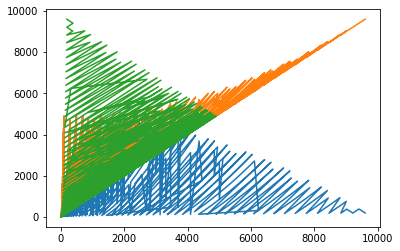

In [26]:
plt.plot(DF["A"], DF["B"]) #blue
plt.plot(DF["A"], DF["C"]) #ornage
plt.plot(DF["B"], DF["C"]) #green

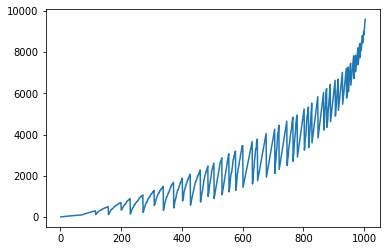

In [27]:
plt.plot(range(1, len(DF["A"])+1), DF["A"])

### becuase of the nature of the formula used to generate PPTs. A is always odd, B always even, and C always odd
### becuase of this, and the nature of the [s,t] forumlas,  a is not ordered. lets order A and see if it makes a difference

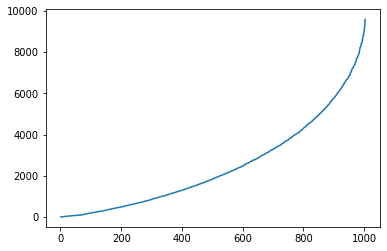

In [28]:
plt.plot(range(1, len(DF["A"])+1), sorted(DF["A"])) #wow

In [29]:
print(len(DF["A"]), sorted(DF["A"]))

1003 [3, 5, 7, 9, 11, 13, 15, 15, 17, 19, 21, 21, 23, 25, 27, 29, 31, 33, 33, 35, 35, 37, 39, 39, 41, 43, 45, 45, 47, 49, 51, 51, 53, 55, 55, 57, 57, 59, 61, 63, 63, 65, 65, 67, 69, 69, 71, 73, 75, 75, 77, 77, 79, 81, 83, 85, 85, 87, 87, 89, 91, 91, 93, 93, 95, 95, 97, 99, 99, 105, 105, 105, 111, 115, 117, 119, 123, 129, 133, 135, 141, 143, 145, 147, 153, 155, 159, 161, 165, 165, 165, 171, 175, 177, 183, 185, 187, 189, 195, 195, 195, 201, 203, 205, 207, 209, 213, 215, 217, 219, 221, 225, 231, 231, 231, 235, 237, 245, 247, 249, 253, 255, 255, 255, 259, 261, 265, 267, 273, 273, 273, 275, 279, 285, 285, 285, 287, 291, 295, 297, 299, 301, 305, 315, 315, 315, 319, 323, 325, 329, 333, 335, 341, 345, 345, 351, 355, 357, 357, 365, 369, 371, 377, 385, 385, 385, 387, 391, 395, 399, 399, 403, 405, 407, 413, 415, 423, 425, 427, 429, 429, 435, 435, 437, 441, 445, 451, 455, 455, 455, 459, 465, 465, 469, 473, 475, 477, 481, 483, 483, 485, 493, 495, 495, 495, 497, 511, 513, 517, 525, 525, 527, 531, 53

In [31]:
print(len(np.unique(DF["A"])))

892


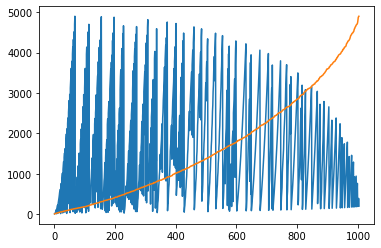

In [34]:
#lets look at b
plt.plot(range(1, len(DF["B"])+1), DF["B"])
plt.plot(range(1, len(DF["B"])+1), sorted(DF["B"]))

In [39]:
print(sorted(DF["B"]))

[4, 8, 12, 12, 16, 20, 20, 24, 24, 28, 28, 32, 36, 36, 40, 40, 44, 44, 48, 48, 52, 52, 56, 56, 60, 60, 60, 60, 64, 68, 68, 72, 72, 76, 76, 80, 80, 84, 84, 84, 84, 88, 88, 92, 92, 96, 96, 100, 100, 104, 104, 108, 108, 112, 112, 116, 116, 120, 120, 120, 120, 124, 124, 128, 132, 132, 132, 132, 136, 136, 140, 140, 140, 140, 144, 144, 148, 148, 152, 152, 156, 156, 156, 156, 160, 160, 164, 164, 168, 168, 168, 168, 172, 172, 176, 176, 180, 180, 180, 180, 184, 184, 188, 188, 192, 192, 196, 196, 200, 204, 204, 204, 208, 212, 216, 220, 220, 220, 224, 228, 228, 228, 232, 236, 240, 240, 240, 244, 248, 252, 252, 252, 260, 260, 260, 264, 264, 264, 268, 272, 276, 276, 276, 280, 280, 280, 284, 288, 292, 296, 300, 300, 300, 304, 308, 308, 308, 312, 312, 312, 316, 320, 324, 328, 332, 336, 336, 336, 340, 340, 340, 344, 348, 348, 348, 352, 356, 360, 360, 360, 364, 364, 364, 368, 372, 372, 372, 376, 380, 380, 380, 384, 388, 392, 396, 396, 400, 408, 408, 408, 416, 420, 420, 420, 420, 420, 420, 424, 432, 440